In [13]:
from alefuncs import list_of_files, parse_fasta, parse_fastq, split_overlap



In [ ]:
fastqs = list(list_of_files('/Users/alec/Downloads/to_ale', 'fq'))
refs = list(list_of_files('/Users/alec/Downloads/to_ale_ref', 'fa'))

for fastq in fastqs:
    _id = fastq.split('/')[-1].split('.fq')[0]
    ref = [f for f in refs if _id in f]
    assert len(ref) == 1
    ref = ref[0]
    print('...')
    print(_id)
    print(fastq)
    print(ref)
    print()
    !seqtk seq -a $fastq | head -c 500 | dnacol
    !echo '\n'
    !cat $ref | dnacol

In [10]:
fastqs = list(list_of_files('/Users/alec/Downloads/to_ale', 'fq'))
refs = list(list_of_files('/Users/alec/Downloads/to_ale_ref', 'fa'))

db = {}
for ref in refs:
    db.update(parse_fasta(ref))
db

{'19:19523652-19523741': 'AGGCCAGTAAAGTAGGCCTCCAATTTACGATGGATTGACTTAAAATTTTTCAACTTTATGTTGGGTTTATCAGAGGTAACCCCATTGTA',
 '22:28330534-28330662': 'TACACATCTACAGGCTTGACTAGGTCCAGTTGGAATATTTTTGGTAAACTTACTTCTTAGGTGGTAATGTGTTCTGTGAAAACACATATATATAGCCAAGACAATGGGAAAATTAAAAAAAGAACAAC',
 'BBCR:0-247': 'GGGCGGTATGTCATGCACACGAATCCCGAAGANTGTTGTCCATTCATTGAATATGAGATCTCNATGGTATGATCAATATNCGGATGCGATATTGATANCTGATAAATCATATATGCATAATCTCACATTATATTTATTATAATAAATCATCGTAGATATACACAATGTGAATTGTATACAATGGATAGTATAACTATCCAATTTCTTTGAGCATTGGCCTTGGTGTAGATTGCATGACATACCGCCC',
 '1:78725060-78725223': 'TCAAGAGACCCATCTCATGTGCAAAGACACACATAGGCTCAAAATAAAGGGAGGGAGGAAAATTTATTAAGCAAATGGAAAACAGAAAAAAGCAGAGGTTGCAATCCTAGTTTATAACAAAGCAGGCTTTAAGCCAACAAAGATCAAAAAAGACAAAAAAGAG',
 '3:181192917-181193079': 'CTTCTTTGTCTTTTTTGATCTATGTTGGTTTACAGTCTGTCTTGTCAGAAACTAGGATTGCAACCTCTGCTTTTTTTCTGTTTTCCATTTGCTTGGTAAAATTTCCTCCATCCCTTTATTTTGAGCCTATATGTGTCTTTGCATGTGAGATGGGTCTCTTGA',
 '7:115916983-115917133': 'TGTCTTTTTTGATCTTTGTTGGCTTAAAGTCTGTTTTGTCTGAAATTAG

In [119]:
import matplotlib.pyplot as plt

def plot_seq(seq, line=50, title=''):
    cmap = {'A':'blue', 'T':'gold', 'C':'red', 'G':'green', 'N':'black'}
    plt.style.use('dark_background')
    #plt.figure(figsize=(16,16))
    for y, bases in enumerate(split_overlap(seq, line, 0)):
        for x, base in enumerate(bases):
            plt.scatter(x, -0.5*y, c=cmap[base.upper()], s=150, marker="s")
    
    plt.ylim([-0.5*y-1, 1])
    plt.title(title)
    plt.show()        

19:19523652-19523741


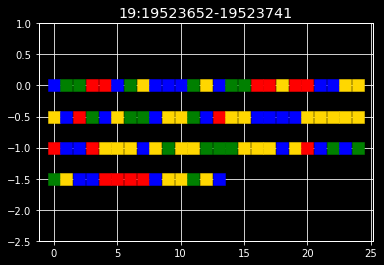

22:28330534-28330662


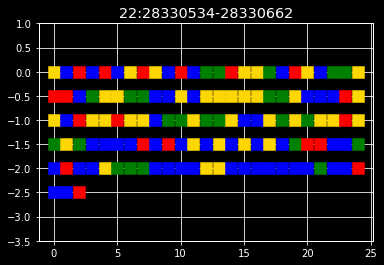

BBCR:0-247


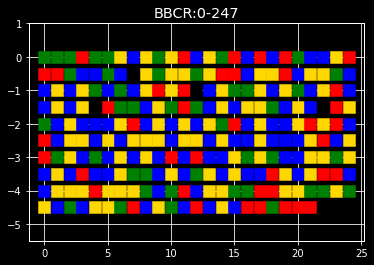

1:78725060-78725223


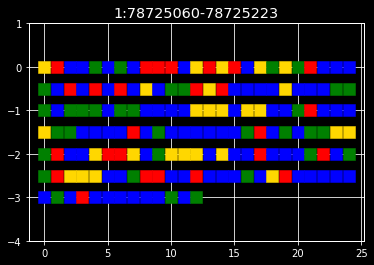

3:181192917-181193079


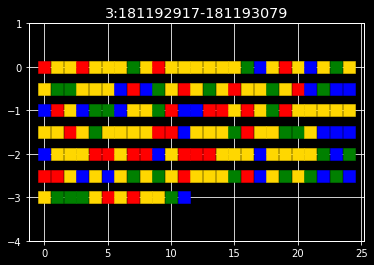

7:115916983-115917133


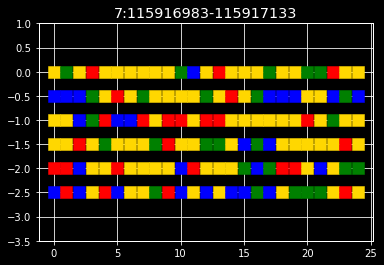

5:72012146-72012259


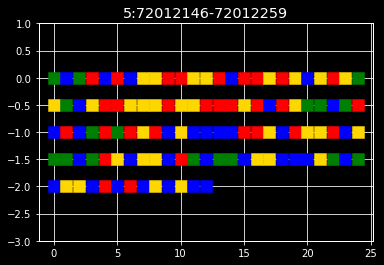

1:110072353-110072499


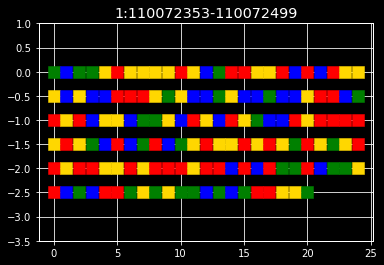

11:39155821-39156173


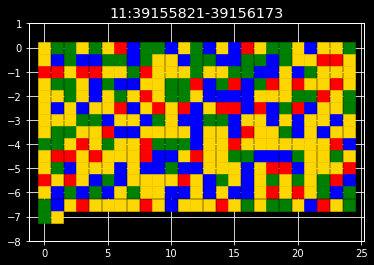

3:141211778-141212038


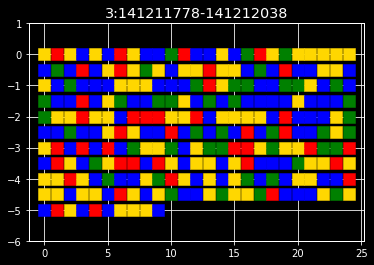

1:331988-332082


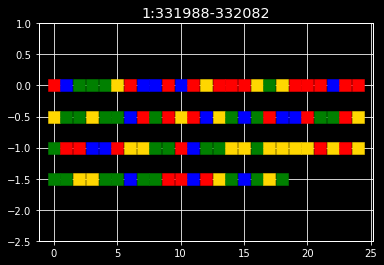

1:657638-657725


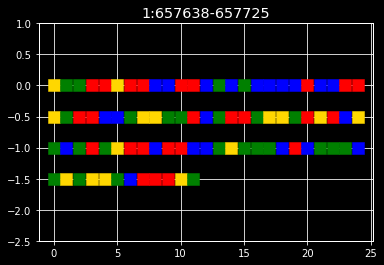

1:222641605-222641699


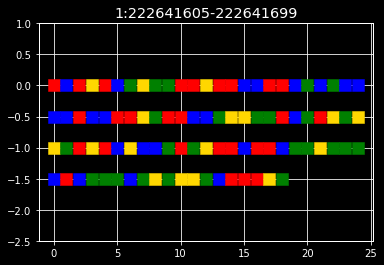

1:228165611-228165703


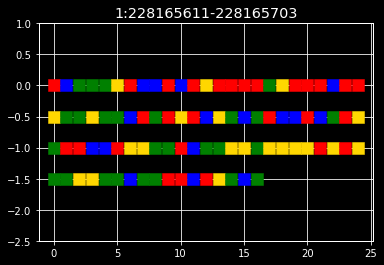

11:123473-123565


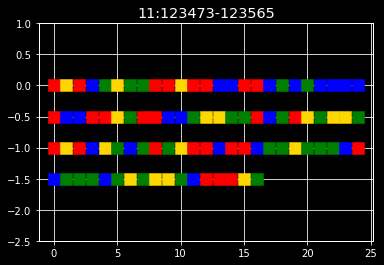

16:90241986-90242080


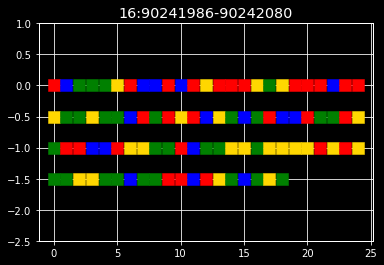

19:193397-193491


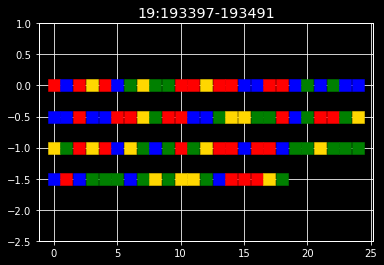

3:197952927-197953021


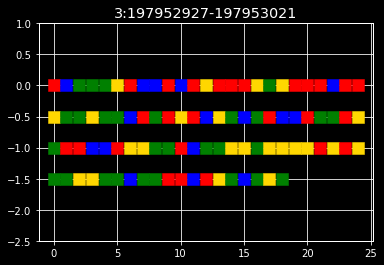

5:180758603-180758697


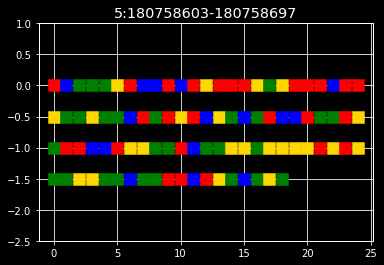

7:63231195-63231287


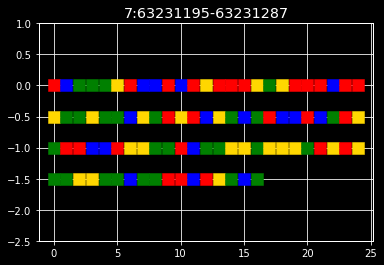

6:159154616-159154769


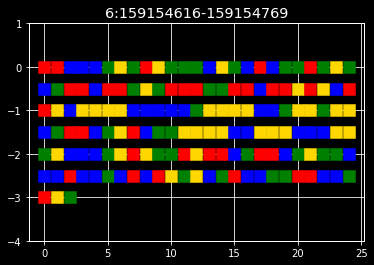

22:18685576-18685641


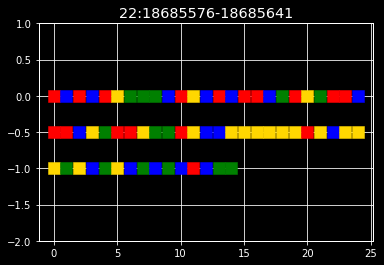

22:18686304-18688237


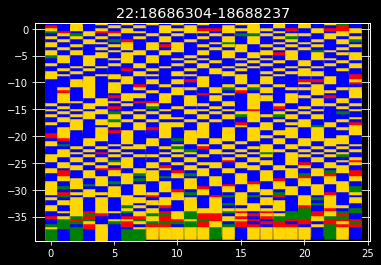

22:18882198-18883837


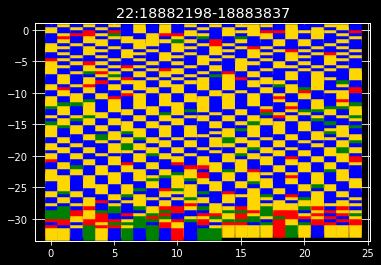

22:20687950-20691446


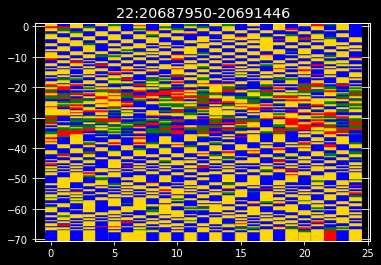

1:110072353-110072501


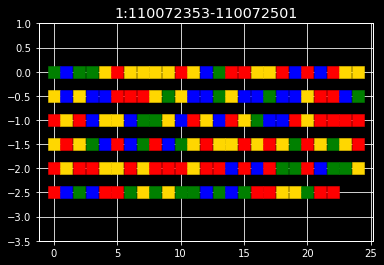

22:27942900-27943076


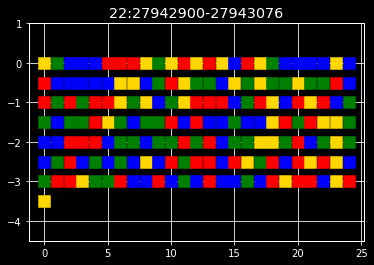

1:97499837-97500049


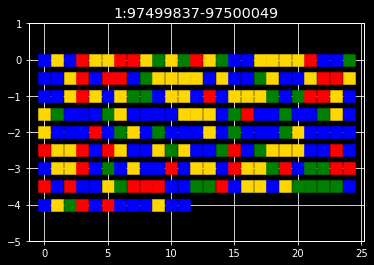

1:62974083-62974496


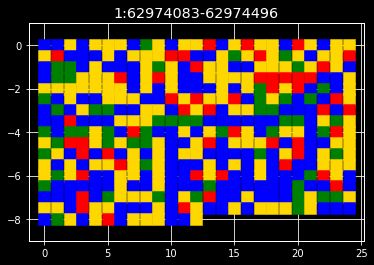

1:83482720-83482886


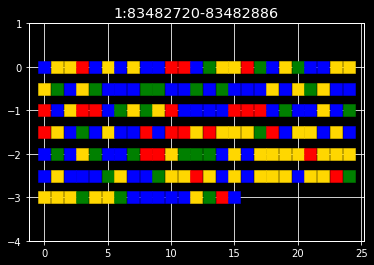

3:127554774-127555115


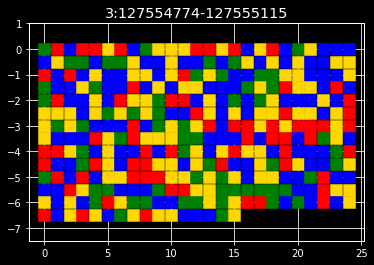

X:50875530-50875771


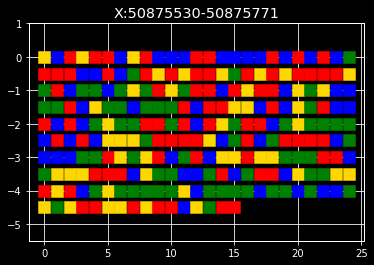

1:33749512-33750062


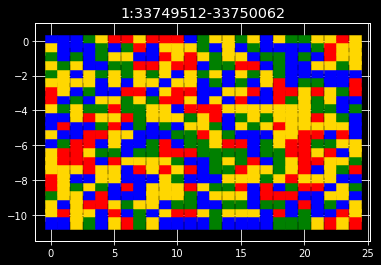

22:27942896-27943076


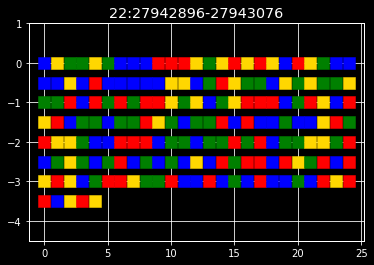

BB22:0-243


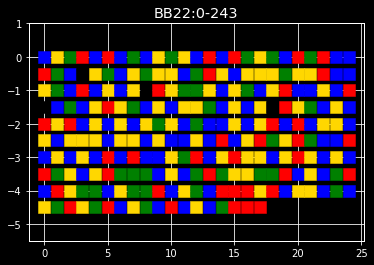

BB24:0-247


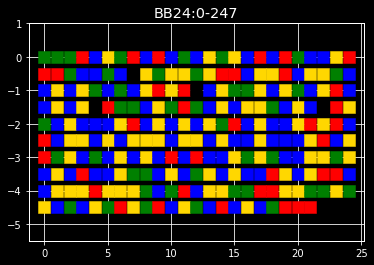

BB25:0-247


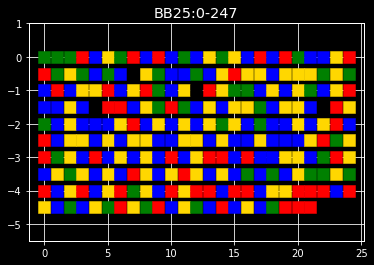

BB36:0-261


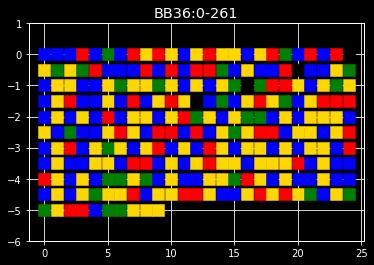

22:24083735-24085293


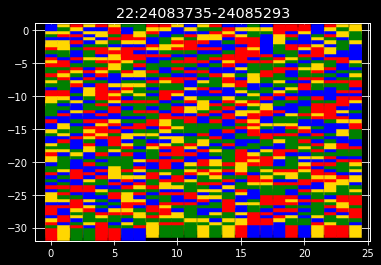

22:20689638-20691446


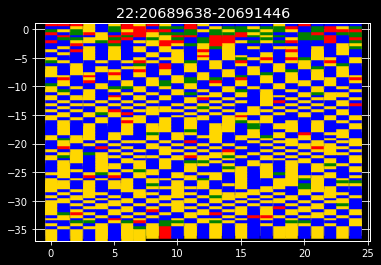

In [120]:
for k, seq in db.items():
    print(k)
    plot_seq(seq, line=25, title=k)
    #break
    